#  Assignment 2
## Sandeep Pal
## Student ID: 202091837
## Date: 26-1-2023

### Import Matplotlib and Pandas, loading population CSV data into dataframe. Note: CSV file is in the same path as the ipynb file.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('population.csv')

### View the dataframe for reference

In [5]:
df

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,MedianAge,UrbanPopulation
0,Asia,Afghanistan,1955,8270991,1.30,103775,19.2,587818
1,Asia,Afghanistan,1960,8996973,1.70,145196,18.8,755797
2,Asia,Afghanistan,1965,9956320,2.05,191869,18.4,984350
3,Asia,Afghanistan,1970,11173642,2.33,243464,17.9,1295433
4,Asia,Afghanistan,1975,12689160,2.58,303104,17.3,1717422
...,...,...,...,...,...,...,...,...
4225,Africa,Zimbabwe,2016,14030331,1.56,215702,18.5,5215894
4226,Africa,Zimbabwe,2017,14236595,1.47,206264,18.5,5328766
4227,Africa,Zimbabwe,2018,14438802,1.42,202207,18.5,5447513
4228,Africa,Zimbabwe,2019,14645468,1.43,206666,18.5,5571525


### Q1) The below code recreate the line plot that shows the population of Canada between the years 1955 and 2020 using functional API.
Step 1: Retrieve the dataframe to 's' with Canadian data between 1955 and 2020 \
Step 2: Extract the Year and Population datapoints to x and y from the Canadian dataframe s and plot the line graph \
Step 3: Set Labels,title, limits and the tics \

Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html and class notes



([<matplotlib.axis.YTick at 0x27d0e482550>,
 [Text(0, 15000000, '15M'),
  Text(0, 20000000, '20M'),
  Text(0, 25000000, '25M'),
  Text(0, 30000000, '30M'),
  Text(0, 35000000, '35M')])

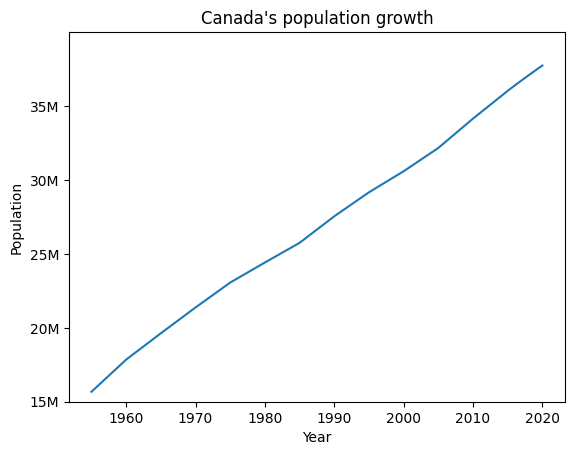

In [6]:
s = df[(df['Year'] >= 1955) & (df['Year'] <= 2020) & (df['Country'].str.contains('Canada'))]
x = s['Year']
y = s['Population']
plt.plot(x, y)
#plt.xlim((0, 40e6))
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Canada\'s population growth')
plt.ylim(15e6, 40e6)
plt.yticks([15000000, 20000000, 25000000, 30000000,35000000], ['15M', '20M', '25M','30M','35M'])



### Q2) The below code recreates the following plot using Matplotlib’s functional API. This line plot shows the percentage of the world’s population that are living in urban areas. This has increased from low 30% to mid 50% over the past 60 years.

Step 1: Retrieve the dataframe to 's' with data on or after 1955. \
Step 2: Group the sum of all the columns based on year and update the s dataframe with the summed values \
step 3: Create a new column urban_pop_change which has the percentage of world's population living in urban areas per year represented by each row ((s.UrbanPopulation/s.Population)*100) \
Step 4: Set x and Y with the datapoints of year from the dataframs s and the urban population change percentage and plot the line graph \
Step 5: Set Labels,title, limits and the tics

Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html and class notes

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_2168\2026625783.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  s = s.groupby('Year').sum().reset_index()


([<matplotlib.axis.YTick at 0x27d10629a50>,
 [Text(0, 30, '30%'),
  Text(0, 35, '35%'),
  Text(0, 40, '40%'),
  Text(0, 45, '45%'),
  Text(0, 50, '50%'),
  Text(0, 55, '55%')])

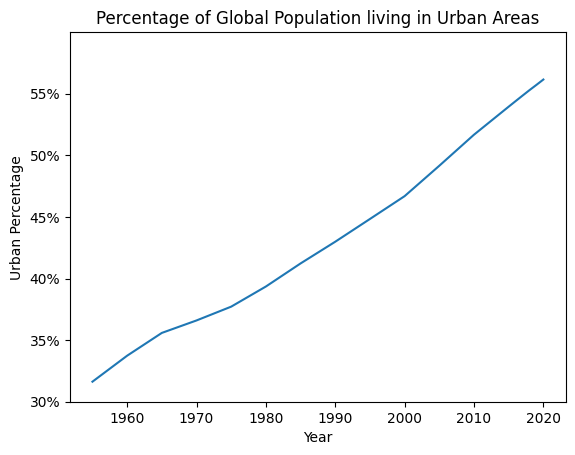

In [7]:
s = df[(df['Year'] >= 1955)]
s = s.groupby('Year').sum().reset_index()
s['urban_pop_change'] = (s.UrbanPopulation/s.Population)*100
x = s['Year']
y = s['urban_pop_change']
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Urban Percentage')
plt.title('Percentage of Global Population living in Urban Areas')

plt.ylim(30, 60)
plt.yticks([30, 35, 40, 45, 50, 55], ['30%', '35%', '40%','45%','50%','55%'])

### Q3) The below code recreates the following plot using Matplotlib’s Object oriented API. This line plot shows the yearly population change (Yearly change, absolute number) per continent over the past 60 years.

Step 1: Retrieve the dataframe to 'continent_data' grouping the sum of all columns per year for all continent. \
Step 2: For each continent extract the respective continent dataframe represented by continent specific variables like africa_continent_data,asia_continent_data \
step 3: Create the figure object adding the axes to it \
Step 4: Plot with the datapoints of year and yearlychange values from each respective continent dataframes adding the labels for the legend
Step 5: Set Labels,title, limits and the tics \

Reference: class notes and https://matplotlib.org/stable/api/legend_api.html

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_2168\3186764079.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_data = df.groupby(['Continent','Year']).sum().reset_index()


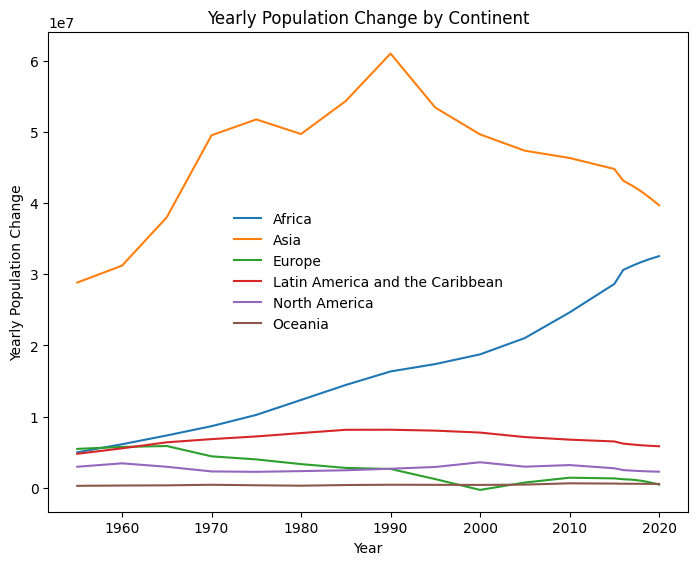

In [11]:
continent_data = df.groupby(['Continent','Year']).sum().reset_index()
africa_continent_data = continent_data[continent_data['Continent'].str.contains('Africa')]
asia_continent_data = continent_data[continent_data['Continent'].str.contains('Asia')]
europe_continent_data = continent_data[continent_data['Continent'].str.contains('Europe')]
Latin_America_and_the_Caribbean_continent_data = continent_data[continent_data['Continent'].str.contains('Latin America and the Caribbean')]
North_America_continent_data = continent_data[continent_data['Continent'].str.contains('North America')]
Oceania_continent_data = continent_data[continent_data['Continent'].str.contains('Oceania')]

fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(africa_continent_data['Year'], africa_continent_data['YearlyChange'], label="Africa")
ax.plot(asia_continent_data['Year'], asia_continent_data['YearlyChange'], label="Asia")
ax.plot(europe_continent_data['Year'], europe_continent_data['YearlyChange'], label="Europe")
ax.plot(Latin_America_and_the_Caribbean_continent_data['Year'], Latin_America_and_the_Caribbean_continent_data['YearlyChange'], label="Latin America and the Caribbean")
ax.plot(North_America_continent_data['Year'], North_America_continent_data['YearlyChange'], label="North America")
ax.plot(Oceania_continent_data['Year'], Oceania_continent_data['YearlyChange'], label="Oceania")
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Population Change')
ax.set_title('Yearly Population Change by Continent')
ax.legend(loc='center', framealpha=0)
fig


### Q4) The below code recreates the following plot using Matplotlib’s Object oriented API. This scatter plot shows the median age and percentage population growth (Yearly%Change) from the year 2019 to 2020 for all
Step 1: Retrieve the dataframe to 'continent_data' with all the data from 2019 to 2020. \
Step 2: For each continent extract the respective continent dataframe represented by continent specific variables like africa , asia \
Step 3: Plot the scatter plot with datapoints of median age and yearly % change values from each respective continent dataframes adding the labels for the legend \ 
Step 4: Set Labels,title, limits and the tics \

Reference: class notes and https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html

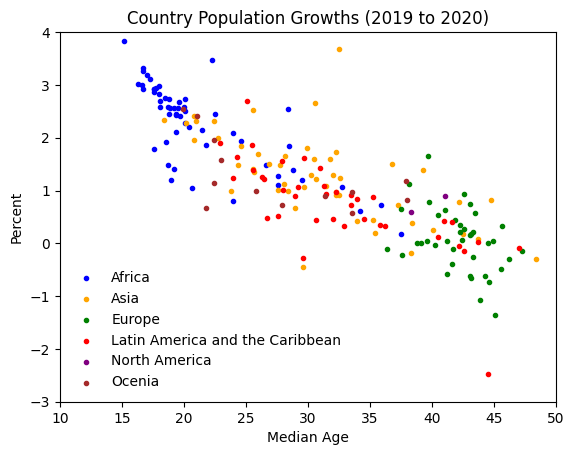

In [159]:
continent_data=df[(df['Year'] > 2019) & (df['Year'] <= 2020)]

asia=continent_data[continent_data['Continent'].str.contains('Asia')]
africa=continent_data[continent_data['Continent'].str.contains('Africa')]
europe=continent_data[continent_data['Continent'].str.contains('Europe')]
Latin_America=continent_data[continent_data['Continent'].str.contains('Latin America and the Caribbean')]
North_America=continent_data[continent_data['Continent'].str.contains('North America')]
Oceania=continent_data[continent_data['Continent'].str.contains('Oceania')]

fig, ax = plt.subplots()

ax.scatter(africa.MedianAge, africa['Yearly%Change'], marker='.',color='blue',label="Africa")
ax.scatter(asia.MedianAge, asia['Yearly%Change'], marker='.',color='orange',label="Asia")
ax.scatter(europe.MedianAge, europe['Yearly%Change'], marker='.',color='green',label="Europe")
ax.scatter(Latin_America.MedianAge, Latin_America['Yearly%Change'], marker='.',color='red',label="Latin America and the Caribbean")
ax.scatter(North_America.MedianAge, North_America['Yearly%Change'], marker='.',color='purple',label="North America")
ax.scatter(Oceania.MedianAge, Oceania['Yearly%Change'], marker='.',color='brown',label="Ocenia")

ax.set_xlim(10, 50)
ax.set_ylim(-3, 4)
ax.set_xlabel('Median Age')
ax.set_ylabel('Percent')
ax.set_title('Country Population Growths (2019 to 2020)')
ax.legend(loc='lower left',scatterpoints=1, fontsize=10,framealpha=0)


### Q5) The below code recreates the following plot using Matplotlib’s Object oriented API. This bar plot shows the population of the top 10 most populous countries in 2020.
Step 1: Retrieve the dataframe sorted by population for 2020 in descending order(Most populous first). \
Step 2: Retrieve the top 10 populous rows from the dataframe \
Step 3: Plot the bar plot horizontally with datapoints of country and population values for each country acting as a height and assign colour for each country \ 
Step 4: Set Labels,title, limits and the tics calling the millions function using dynamic formatter for billions and millions 

References:
https://www.geeksforgeeks.org/how-to-reverse-axes-in-matplotlib/ \
https://www.python-graph-gallery.com/3-control-color-of-barplots \
https://towardsdatascience.com/analysing-and-visualising-the-country-wise-population-from-1955-to-2020-with-pandas-matplotlib-70b3614eed6b \
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html 


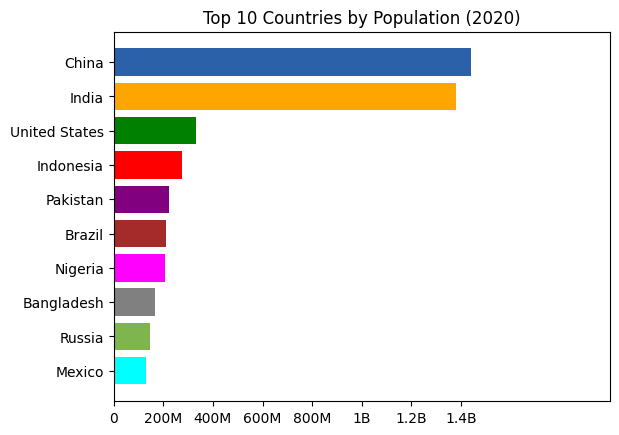

In [160]:
# def millions(x, pos):
#     """The two args are the value and tick position."""
#     if x >= 1_000_000_000:
#         return '{:1.1f}B'.format(x*1e-9)
#     else:
#         return '{:1.0f}M'.format(x*1e-6)
    
current_population_sorted = df[df['Year'] == 2020].sort_values(by='Population', ascending=False)
current_population_top = current_population_sorted[:10].reset_index()
fig = plt.Figure()
ax = fig.add_axes([0, 0, 1, 1])
fig, ax = plt.subplots()
ax.barh(current_population_top.Country,  current_population_top.Population,color=['#2A61A9','orange','green', 'red', 'purple', 'brown','magenta','grey','#7eb54e','cyan'])
ax.set_xlim(0,20e8)
ax.set_title(label = 'Top 10 Countries by Population (2020)')
ax.invert_yaxis()
#plt.yticks([15000000, 20000000, 25000000, 30000000,35000000], ['15M', '20M', '25M','30M','35M'])
ax.set_xticks([0, 200000000, 400000000, 600000000,800000000, 1000000000,1200000000,1400000000], ['0', '200M', '400M','600M','800M','1B','1.2B','1.4B'])


#CALL TO THE TICKER FORMATTER FUNCTION
#ax.xaxis.set_major_formatter(millions)
